/var/folders/bv/ghjrxv6j7pl2ttzvdds70ldh0000gn/T/ipykernel_85749/241153353.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(median_value, inplace=True)
/var/folders/bv/ghjrxv6j7pl2ttzvdds70ldh0000gn/T/ipykernel_85749/241153353.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 139)            │         9,035 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,731 (120.04 KB)

 Trainable params: 30,731 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.1893 - loss: 3.2118 - val_accuracy: 0.3475 - val_loss: 2.1339
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.3749 - loss: 2.0121 - val_accuracy: 0.4088 - val_loss: 1.8796
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.4252 - loss: 1.7872 - val_accuracy: 0.4411 - val_loss: 1.7492
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.4553 - loss: 1.6643 - val_accuracy: 0.4490 - val_loss: 1.6790
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.4786 - loss: 1.5638 - val_accuracy: 0.4634 - val_loss: 1.6152
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.4882 - loss: 1.5084 - val_accuracy: 0.4840 - val_loss: 1.5510
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.5054 - loss: 1.4352 - val_accuracy: 0.4889 - val_loss: 1.5220
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5209 - loss: 1.3825 - 

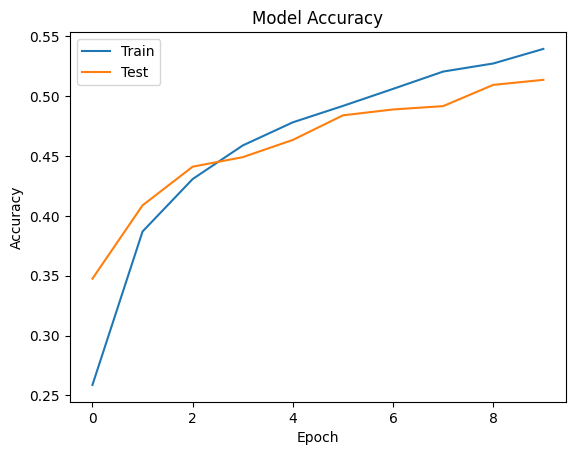

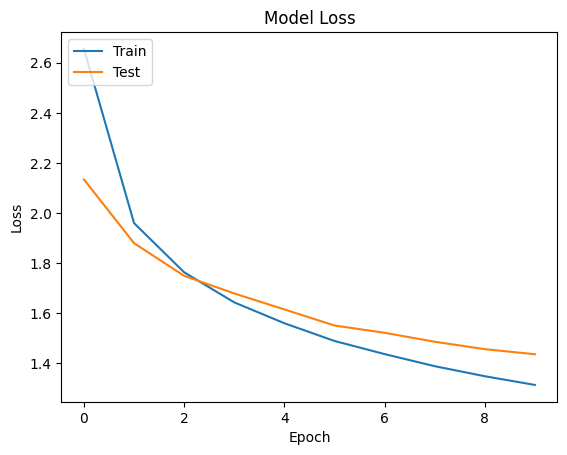

In [1]:
# Import necessary libraries
import sys
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Install necessary packages using pip
!{sys.executable} -m pip install pandas tensorflow scikit-learn matplotlib
!{sys.executable} -m pip install --upgrade pip

# Load the dataset from a CSV file
file_path = 'Vehicle MPG - 1984 to 2023.csv'
data = pd.read_csv(file_path)

# Drop the 'Model' column which is not needed for the analysis
data_dropped = data.drop('Model', axis=1)

# Summarize missing values to identify columns needing attention
missing_data_summary = data_dropped.isnull().sum()

# Determine data types to distinguish between categorical and numeric columns
column_types = data_dropped.dtypes

# Drop additional specified columns
data_cleaned = data_dropped.drop(['Fuel Type 2', 'Engine Description'], axis=1)

# Fill missing numeric values with the median for robust central tendency
for column in ['Engine Cylinders', 'Engine Displacement']:
    median_value = data_cleaned[column].median()
    data_cleaned[column].fillna(median_value, inplace=True)

# Drop rows with any remaining missing values
data_cleaned.dropna(inplace=True)

# Confirm no remaining missing values
final_missing_data_summary = data_cleaned.isnull().sum()

# Select categorical columns for one-hot encoding
categorical_columns = ['Make', 'Fuel Type 1', 'Drive', 'Transmission', 'Vehicle Class']
one_hot_encoder = OneHotEncoder()
encoded_categorical = one_hot_encoder.fit_transform(data_cleaned[categorical_columns]).toarray()

# Create a DataFrame from the encoded categorical data
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(categorical_columns))
encoded_categorical_df.index = data_cleaned.index  # Align indices

# Select and normalize numeric columns
numeric_columns = [col for col in data_cleaned.columns if col not in categorical_columns and data_cleaned[col].dtype in ['int64', 'float64']]
scaler = StandardScaler()
normalized_numeric = scaler.fit_transform(data_cleaned[numeric_columns])

# Create a DataFrame from the normalized numeric data
normalized_numeric_df = pd.DataFrame(normalized_numeric, columns=numeric_columns)
normalized_numeric_df.index = data_cleaned.index  # Align indices

# Combine encoded categorical data and normalized numeric data
final_preprocessed_data = pd.concat([encoded_categorical_df, normalized_numeric_df], axis=1)

# Prepare the target data (y) and feature data (X)
X = final_preprocessed_data.drop([col for col in final_preprocessed_data.columns if 'Make_' in col], axis=1)
y = final_preprocessed_data[[col for col in final_preprocessed_data.columns if 'Make_' in col]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile a neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()